In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates


#Load modified plant 2 datasets
P2=pd.read_csv('archive/Plant2_summed_dataset.csv',na_values= '?')
# display(P2)

P2 = P2[['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
display(P2)



,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,23.291048,22.373909,0.0


In [125]:
feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
X = P2[feature_names]
y = P2['AC_POWER']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


# See that the data is split properly in time. Can add "DATE_TIME" t ofeatures, to verify.
display(X_train)
display(X_test)

#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)



,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,27.004764,25.060789,0.0
1,26.880811,24.421869,0.0
2,26.682055,24.427290,0.0
3,26.500589,24.420678,0.0
4,26.596148,25.088210,0.0
...,...,...,...
2678,23.090081,21.662188,0.0
2679,23.077111,21.622833,0.0
2680,23.062494,21.668886,0.0
2681,22.998344,21.650674,0.0


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2683,23.096334,21.819370,0.0
2684,23.073426,21.868107,0.0
2685,23.198418,21.921284,0.0
2686,23.259188,21.790160,0.0
2687,23.268280,22.156883,0.0
...,...,...,...
3254,23.511703,22.856201,0.0
3255,23.482282,22.744190,0.0
3256,23.354743,22.492245,0.0
3257,23.291048,22.373909,0.0


,0,1,2
0,-1.078654,-0.959122,-0.750711
1,-1.087364,-0.952811,-0.750711
2,-1.039840,-0.945925,-0.750711
3,-1.016735,-0.962904,-0.750711
4,-1.013278,-0.915416,-0.750711
...,...,...,...
571,-0.920725,-0.824858,-0.750711
572,-0.931911,-0.839363,-0.750711
573,-0.980404,-0.871989,-0.750711
574,-1.004621,-0.887312,-0.750711


In [126]:
# NOT ISED!!! Jut example of TimeSeriesSplit

# # import xgboost as xgb
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# # X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# # y = np.array([1, 6, 7, 1, 2, 3])

# # model = xgb.XGBRegressor()
# param_search = {'max_depth' : [3, 5]}

# tscv = TimeSeriesSplit(n_splits=2)
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_search)
# gsearch.fit(X, y)

In [127]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


# from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
tscv = TimeSeriesSplit(n_splits=7)
dtr2 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


Score is 79.1488 %
{'max_depth': 2, 'min_impurity_decrease': 0}
0.872074924516304


In [128]:
results = pd.DataFrame(grid.cv_results_)
display(results)

display(results[['params','mean_test_score','mean_train_score']])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.007433,0.002678,0.003154,0.000522,2,0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
1,0.009822,0.002894,0.004296,0.001572,2,1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
2,0.007185,0.003785,0.003364,0.001128,2,2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
3,0.005234,0.001006,0.002716,0.000747,2,3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
4,0.005375,0.001076,0.002570,0.000862,2,4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.007720,0.001323,0.003225,0.001034,9,10,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.625718,0.805591,0.912747,...,106,0.999257,0.983457,0.968459,0.967409,0.966219,0.960165,0.944190,0.969879,0.016139
116,0.010399,0.004664,0.003585,0.001300,9,11,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.625698,0.805591,0.912747,...,108,0.999256,0.983457,0.968459,0.967409,0.966219,0.960164,0.944189,0.969879,0.016139
117,0.008323,0.002739,0.003803,0.001661,9,12,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.625698,0.805591,0.912749,...,109,0.999256,0.983457,0.968459,0.967408,0.966218,0.960164,0.944188,0.969878,0.016139
118,0.008671,0.002892,0.003230,0.000715,9,13,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.625698,0.808342,0.912749,...,110,0.999256,0.983456,0.968458,0.967408,0.966218,0.960163,0.944187,0.969878,0.016139


,params,mean_test_score,mean_train_score
0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.859536,0.905553
1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.859536,0.905553
2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.859536,0.905553
3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.859536,0.905553
4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.859536,0.905553
...,...,...,...
115,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.815882,0.969879
116,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.814251,0.969879
117,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.813705,0.969878
118,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.813702,0.969878


Score is 88.2935 %
{'n_estimators': 32}
0.8856226038900051
0     0.846236
1     0.859098
2     0.860903
3     0.862022
4     0.862402
5     0.862910
6     0.862571
7     0.862671
8     0.863399
9     0.864044
10    0.864562
11    0.864069
12    0.864378
13    0.864131
14    0.864083
15    0.864189
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.012513,0.002496,0.004146,0.001086,2,{'n_estimators': 2},0.687064,0.862365,0.904552,0.864164,...,16,0.966404,0.884677,0.894470,0.903145,0.897962,0.898537,0.895386,0.905797,0.025290
1,0.020882,0.004456,0.004389,0.000827,5,{'n_estimators': 5},0.667524,0.910788,0.924062,0.870765,...,15,0.980603,0.894064,0.902936,0.911175,0.905933,0.903697,0.903543,0.914565,0.027366
2,0.033302,0.003597,0.004077,0.000866,8,{'n_estimators': 8},0.657732,0.909438,0.930328,0.874808,...,14,0.981898,0.897137,0.907191,0.914640,0.908377,0.905460,0.906004,0.917244,0.026822
3,0.066058,0.028139,0.012687,0.012618,11,{'n_estimators': 11},0.656969,0.913960,0.931452,0.875599,...,13,0.982989,0.899080,0.908759,0.914727,0.908368,0.905697,0.906477,0.918014,0.026872
4,0.071777,0.016334,0.015057,0.018892,14,{'n_estimators': 14},0.652709,0.917431,0.932692,0.876586,...,12,0.984081,0.898353,0.908946,0.915272,0.908613,0.906058,0.906927,0.918322,0.027242
5,0.084570,0.021658,0.008971,0.001199,17,{'n_estimators': 17},0.655845,0.917544,0.932489,0.876056,...,9,0.984089,0.898951,0.909259,0.915187,0.908720,0.906157,0.906796,0.918451,0.027165
6,0.121516,0.052392,0.008737,0.002721,20,{'n_estimators': 20},0.658374,0.913575,0.932033,0.875974,...,11,0.983473,0.899353,0.909230,0.914726,0.908200,0.905798,0.906197,0.918140,0.027008
7,0.109574,0.021755,0.008742,0.001658,23,{'n_estimators': 23},0.655956,0.913753,0.932270,0.876357,...,10,0.984020,0.899558,0.909627,0.915267,0.908918,0.906109,0.906653,0.918593,0.027062
8,0.173545,0.076144,0.022521,0.021857,26,{'n_estimators': 26},0.653530,0.917054,0.932962,0.877729,...,8,0.984535,0.900162,0.910733,0.915877,0.909542,0.906698,0.907026,0.919225,0.027023
9,0.135629,0.033870,0.013959,0.006710,29,{'n_estimators': 29},0.653103,0.921193,0.933365,0.878461,...,7,0.984578,0.900450,0.910993,0.916150,0.909716,0.907053,0.907170,0.919444,0.026951


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\2676497153.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\2676497153.py:38: DeprecationWarning: `np.int` is a deprecat

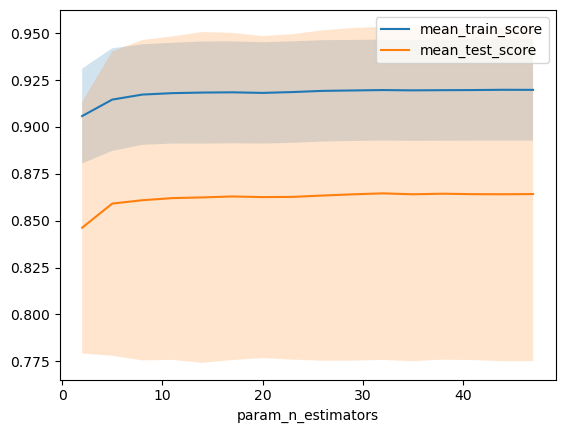

In [282]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, min_impurity_decrease=0.0, max_depth=None,  random_state=42, n_jobs=-1)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")




# param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
#     # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
# tscv = TimeSeriesSplit(n_splits=7)
# dtr2 = DecisionTreeRegressor(random_state=42)
# grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.score(X_test, y_test))


param_grid_tree = {'n_estimators': range(2,50,3)}
rfr2 = RandomForestRegressor(min_impurity_decrease=0, max_depth=3, max_features=2, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_depth': 3}
0.8979233000540515
0    0.805960
1    0.867950
2    0.854515
3    0.842766
4    0.840860
5    0.833988
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.028337,0.010849,0.007889,0.003915,1,{'max_depth': 1},0.620318,0.887092,0.885050,0.818425,...,6,0.910561,0.829222,0.850525,0.859447,0.843600,0.837462,0.840421,0.853034,0.025112
1,0.034632,0.011944,0.008186,0.008112,3,{'max_depth': 3},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
2,0.041151,0.015495,0.005886,0.001913,5,{'max_depth': 5},0.622708,0.909967,0.931358,0.876499,...,2,0.992290,0.938054,0.939533,0.937393,0.928769,0.922953,0.918182,0.939596,0.022793
3,0.042742,0.008504,0.005660,0.002280,7,{'max_depth': 7},0.615504,0.899715,0.923772,0.861034,...,3,0.996259,0.962316,0.960306,0.953787,0.944056,0.939535,0.932106,0.955481,0.019519
4,0.039145,0.012271,0.007600,0.003523,9,{'max_depth': 9},0.630296,0.887858,0.923390,0.860376,...,4,0.996769,0.973780,0.973800,0.966201,0.958676,0.955237,0.947436,0.967414,0.014968
5,0.042299,0.005944,0.005813,0.001314,11,{'max_depth': 11},0.613278,0.884338,0.917785,0.854669,...,5,0.996834,0.977203,0.979116,0.978193,0.969682,0.965175,0.960640,0.975263,0.010949


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\997741295.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\997741295.py:18: DeprecationWarning: `np.int` is a deprecated al

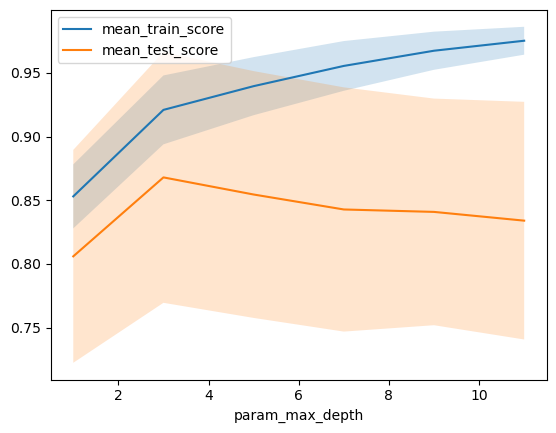

In [293]:
param_grid_tree = {'max_depth': range(1,12,2)}

rfr2 = RandomForestRegressor(n_estimators=6, min_impurity_decrease=0, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'min_impurity_decrease': 0}
0.8856226038900051
0    0.864562
1    0.864562
2    0.864562
3    0.864562
4    0.864562
5    0.864562
6    0.864562
7    0.864562
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.167189,0.069302,0.019808,0.017098,0,{'min_impurity_decrease': 0},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
1,0.209877,0.095381,0.017147,0.011744,5,{'min_impurity_decrease': 5},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
2,0.188449,0.111340,0.012854,0.002511,10,{'min_impurity_decrease': 10},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
3,0.165643,0.058646,0.012356,0.004019,15,{'min_impurity_decrease': 15},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
4,0.162777,0.056743,0.012648,0.004642,20,{'min_impurity_decrease': 20},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
5,0.132902,0.035625,0.011040,0.002682,25,{'min_impurity_decrease': 25},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
6,0.157573,0.029738,0.010052,0.001855,30,{'min_impurity_decrease': 30},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
7,0.117051,0.016184,0.007867,0.001497,35,{'min_impurity_decrease': 35},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\218450040.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\218450040.py:18: DeprecationWarning: `np.int` is a d

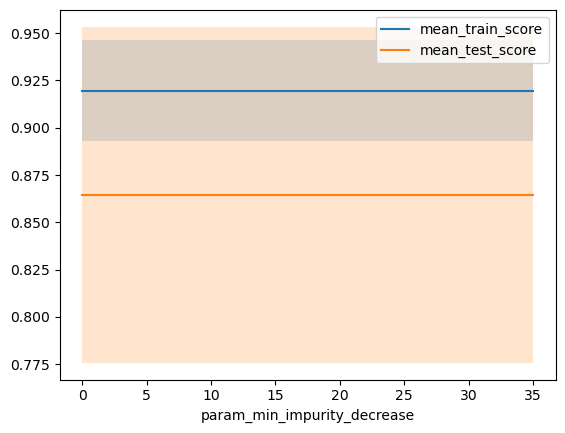

In [294]:
param_grid_tree = {'min_impurity_decrease': range(0,40,5)}

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, max_features=2, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_min_impurity_decrease', 'mean_train_score')
results.plot('param_min_impurity_decrease', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_features': 2}
0.8856226038900051
0    0.840341
1    0.864562
2    0.863896
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.083936,0.021683,0.017896,0.010459,1,{'max_features': 1},0.698095,0.873019,0.911791,0.845035,...,3,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
1,0.107900,0.031686,0.007105,0.001779,2,{'max_features': 2},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916
2,0.109927,0.018668,0.008932,0.005196,3,{'max_features': 3},0.624940,0.923397,0.932585,0.882583,...,2,0.986751,0.900009,0.912612,0.918451,0.912190,0.908920,0.909304,0.921177,0.027257


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\3324244303.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_features.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\3324244303.py:18: DeprecationWarning: `np.int` is a deprecat

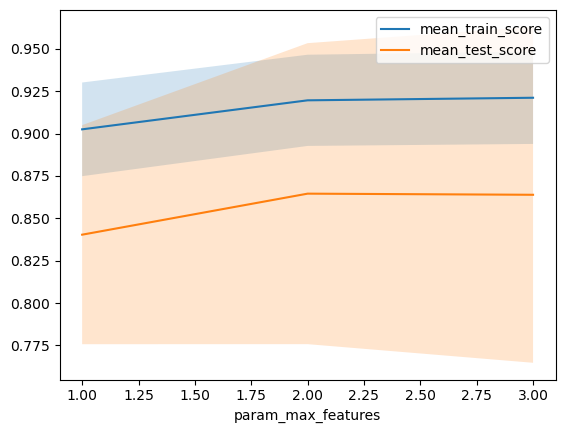

In [295]:
param_grid_tree = {'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_features', 'mean_train_score')
results.plot('param_max_features', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

Train score is 90.4896 %
Score is 88.5623 %


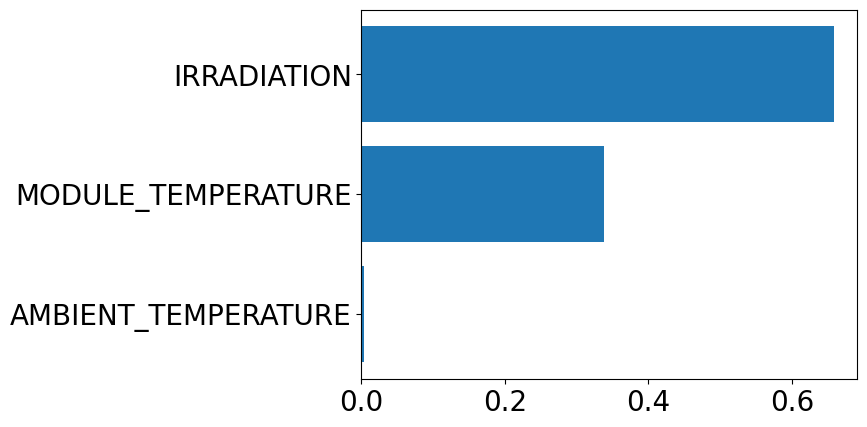

In [296]:
rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)



Train score is 90.7544 %
Score is 89.7910 %


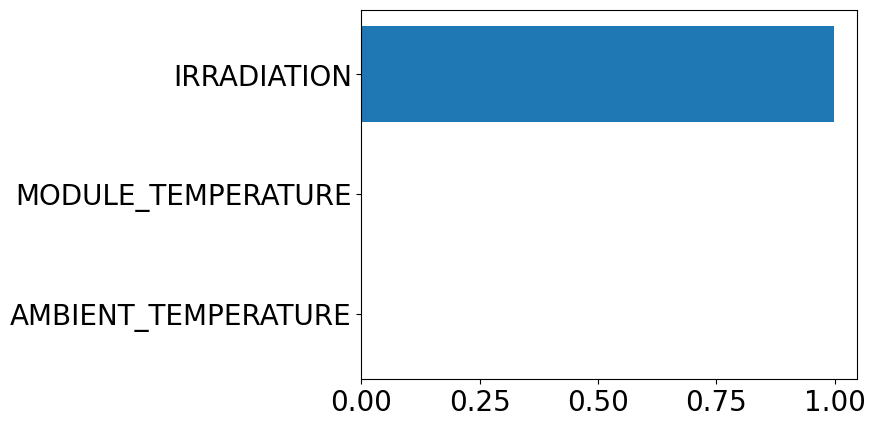

In [297]:
rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


Train score is 90.4896 %
Test score is 88.5623 %


(0.0, 23540.510000000002)

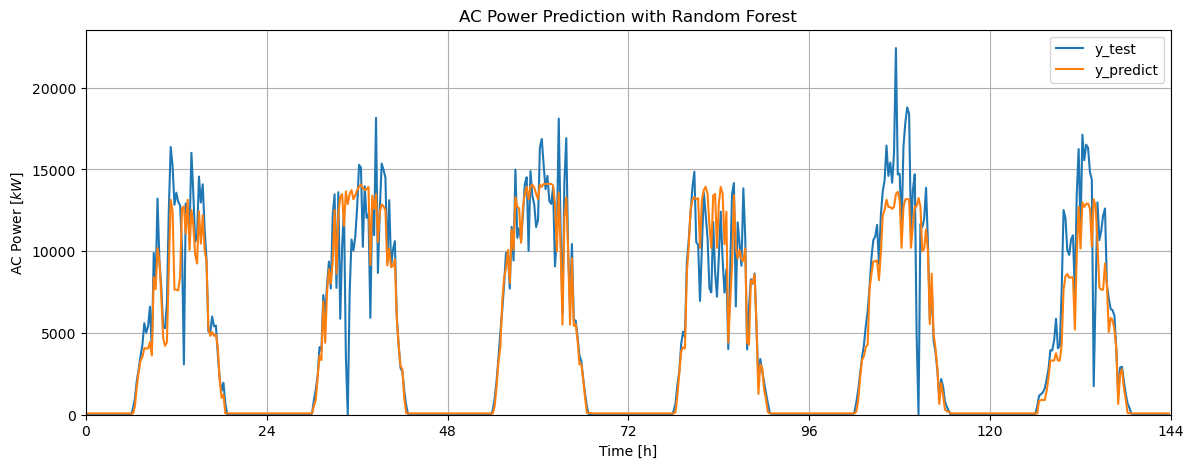

In [315]:

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")

y_predict = rfr2.predict(X_test)


# display(y_test)
y_test_arr = y_test.to_numpy()
# display(y_test_arr)
# display(y_predict)

NN = y_test_arr.size
# print(NN)
time_step = 0.25 #  in hours
new_time_axis = np.linspace(0, NN*time_step-1*time_step, NN)
# print(new_time_axis.size)



plt.figure(figsize=(14,5))
plt.plot(new_time_axis, y_test_arr, label="y_test")
plt.plot(new_time_axis, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time [h]")
plt.grid()
days = 6
plt.xticks(np.arange(0, 24*(days+1), step=24))  # Set label locations.
plt.xlim(24*(0), 24*(days-0))    
plt.ylim(0,max(y_test_arr)*1.05)



2606   2020-06-12 00:00:00
2607   2020-06-12 00:15:00
2608   2020-06-12 00:30:00
2609   2020-06-12 00:45:00
2610   2020-06-12 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 576, dtype: datetime64[ns]

(0.0, 23540.510000000002)

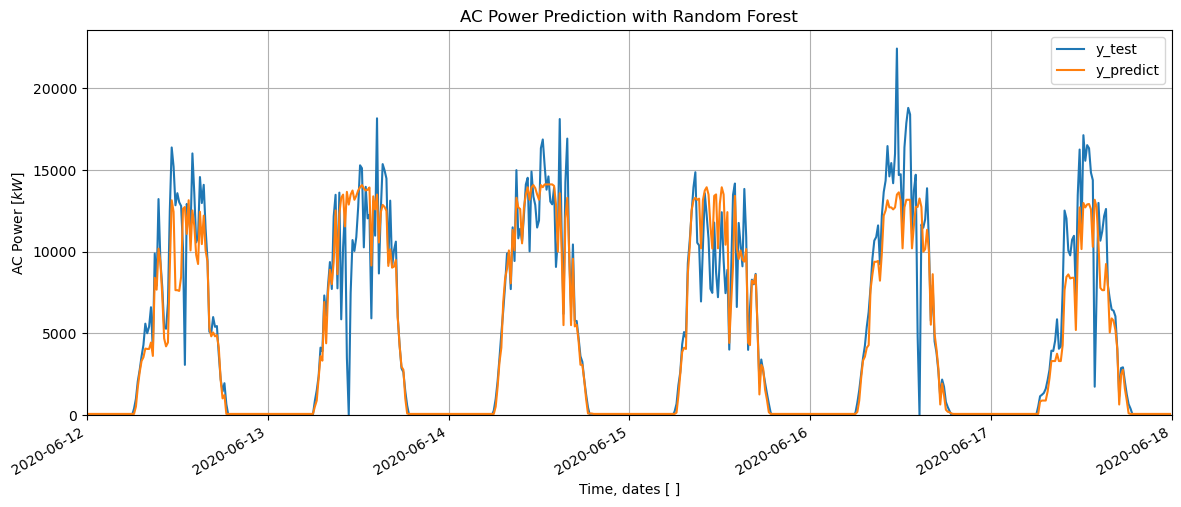

In [299]:
# time_dates = P2.iloc[-NN:,0].to_numpy()

# time_dates = P2[-NN:]["DATE_TIME"]
# time_dates = P2.iloc[-NN:,:]['DATE_TIME']
# # print(time_dates.size)
# display(time_dates)



from helpers import load_data
plant1, plant2, weather1, weather2 = load_data() # I use Mathiases function "load_data()", since this converts "DATE_TIME" to a datetime-format.
time_dates = weather1["DATE_TIME"]
time_dates = time_dates[-NN:]
display(time_dates)


plt.figure(figsize=(14,5))
plt.plot(time_dates, y_test_arr, label="y_test")
plt.plot(time_dates, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time, dates [ ]")
plt.grid()
plt.xticks(rotation=30, ha='right')
plt.xlim(np.datetime64('2020-06-12'),np.datetime64('2020-06-18')) 
plt.ylim(0,max(y_test_arr)*1.05)

In [281]:

# I, Andi, will try to make an exhaustive search for parameters
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}



rfr2 = RandomForestRegressor(random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



{'max_depth': 3, 'max_features': 2, 'min_impurity_decrease': 0, 'n_estimators': 32}
0.9048962584553814
0.8856226038900051
0       0.717237
1       0.717155
2       0.774328
3       0.790134
4       0.775073
          ...   
2299    0.844847
2300    0.845911
2301    0.845700
2302    0.845821
2303    0.846212
Name: mean_test_score, Length: 2304, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_impurity_decrease,param_n_estimators,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.023160,0.009210,0.008010,0.004073,1,1,0,2,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.641901,...,2289,0.874700,0.765679,0.796605,0.785127,0.774074,0.761511,0.771787,0.789926,0.036312
1,0.035416,0.021306,0.006103,0.002246,1,1,0,5,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.680511,...,2297,0.843451,0.758738,0.773249,0.767653,0.759675,0.741202,0.749517,0.770498,0.031377
2,0.033383,0.008007,0.006735,0.002978,1,1,0,8,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.731942,...,2185,0.866915,0.798300,0.813020,0.811870,0.800089,0.786050,0.792987,0.809890,0.024929
3,0.045040,0.017368,0.009301,0.008346,1,1,0,11,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.732738,...,2161,0.888658,0.812011,0.828573,0.830428,0.818958,0.805228,0.810145,0.827714,0.026349
4,0.057976,0.017532,0.006787,0.002170,1,1,0,14,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.723176,...,2177,0.873398,0.803311,0.816028,0.815847,0.804171,0.790989,0.794151,0.813985,0.025829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,0.245470,0.065595,0.012757,0.004920,11,3,35,35,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.630057,...,1399,0.998206,0.985976,0.981875,0.980405,0.974878,0.972461,0.965939,0.979963,0.009648
2300,0.313975,0.156346,0.025288,0.019549,11,3,35,38,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.631535,...,1281,0.998211,0.986054,0.982259,0.980606,0.975079,0.972530,0.965963,0.980100,0.009642
2301,0.306606,0.138641,0.013436,0.002963,11,3,35,41,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.631858,...,1298,0.998234,0.986324,0.982267,0.980480,0.975030,0.972897,0.966168,0.980200,0.009592
2302,0.279624,0.116182,0.015340,0.005162,11,3,35,44,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.630849,...,1289,0.998211,0.986568,0.982224,0.980438,0.974843,0.973051,0.966319,0.980236,0.009574


In [307]:
# I, Andi, will try to make an exhaustive search for parameters
# param_grid_tree = {'n_estimators': range(2,20,2), 'max_depth': range(0,12,1), 'min_impurity_decrease': range(0,40,4), 'max_features': range(1,4,1)}
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}


from sklearn.model_selection import RandomizedSearchCV
rfr2 = RandomForestRegressor(random_state=43)
gridrand = RandomizedSearchCV(rfr2, param_distributions=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1) #, random_state=42
gridrand.fit(X_train, y_train)
print(gridrand.best_params_)
print(gridrand.score(X_train, y_train))
print(gridrand.score(X_test, y_test))

resultsrand = pd.DataFrame(gridrand.cv_results_)
print(resultsrand.loc[:,'mean_test_score'])
display(resultsrand)


{'n_estimators': 35, 'min_impurity_decrease': 5, 'max_features': 3, 'max_depth': 3}
0.9075498323891551
0.8976665645279219
0    0.829014
1    0.843748
2    0.834994
3    0.863960
4    0.846999
5    0.856346
6    0.842317
7    0.843209
8    0.849914
9    0.847722
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.051860,0.005528,0.006960,0.003839,20,20,2,1,"{'n_estimators': 20, 'min_impurity_decrease': ...",0.713022,...,10,0.928039,0.849570,0.868755,0.875529,0.863620,0.851368,0.852195,0.869868,0.025419
1,0.141766,0.055404,0.019720,0.014751,38,0,1,3,"{'n_estimators': 38, 'min_impurity_decrease': ...",0.697949,...,6,0.970208,0.890136,0.897327,0.900586,0.894608,0.889303,0.888247,0.904345,0.027212
2,0.045205,0.026065,0.006615,0.003215,5,25,2,9,"{'n_estimators': 5, 'min_impurity_decrease': 2...",0.609085,...,9,0.996919,0.973253,0.967757,0.964148,0.959953,0.953443,0.950951,0.966632,0.014308
3,0.178912,0.067225,0.015052,0.008171,35,5,3,3,"{'n_estimators': 35, 'min_impurity_decrease': ...",0.625452,...,1,0.986712,0.899852,0.912433,0.918288,0.912034,0.908909,0.909301,0.921076,0.027280
4,0.164070,0.043688,0.016098,0.008321,35,20,1,9,"{'n_estimators': 35, 'min_impurity_decrease': ...",0.638506,...,5,0.996662,0.978749,0.968287,0.964034,0.952745,0.950165,0.944526,0.965024,0.016872
5,0.015988,0.005497,0.005505,0.004236,2,10,3,3,"{'n_estimators': 2, 'min_impurity_decrease': 1...",0.622062,...,2,0.985179,0.895068,0.906245,0.914410,0.908649,0.905698,0.904851,0.917157,0.028276
6,0.131999,0.036494,0.017725,0.010130,23,30,1,11,"{'n_estimators': 23, 'min_impurity_decrease': ...",0.625747,...,8,0.997081,0.981815,0.977406,0.974467,0.966838,0.964879,0.961239,0.974818,0.011328
7,0.142528,0.033750,0.012997,0.006733,26,30,1,11,"{'n_estimators': 26, 'min_impurity_decrease': ...",0.625272,...,7,0.997176,0.982995,0.978050,0.975196,0.967171,0.964330,0.961327,0.975178,0.011507
8,0.213049,0.048161,0.013902,0.004531,47,15,1,7,"{'n_estimators': 47, 'min_impurity_decrease': ...",0.633344,...,3,0.994736,0.957380,0.950724,0.945007,0.935880,0.930658,0.928811,0.949028,0.021034
9,0.075176,0.021494,0.008638,0.002013,11,20,3,7,"{'n_estimators': 11, 'min_impurity_decrease': ...",0.623131,...,4,0.996934,0.967017,0.960658,0.955356,0.943939,0.942489,0.938015,0.957773,0.018703


{'max_depth': 3, 'n_estimators': 32}
0.9048962584553814
0.8856226038900051
0     0.814221
1     0.816440
2     0.834044
3     0.834410
4     0.833984
        ...   
91    0.846401
92    0.846463
93    0.846164
94    0.846248
95    0.846181
Name: mean_test_score, Length: 96, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.011162,0.001296,0.003581,0.001038,1,2,"{'max_depth': 1, 'n_estimators': 2}",0.705397,0.899010,0.872279,...,96,0.917009,0.842079,0.858071,0.870451,0.858066,0.847047,0.844126,0.862407,0.024104
1,0.019150,0.000876,0.004732,0.000839,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.724347,0.904326,0.875252,...,95,0.921343,0.836816,0.853003,0.864115,0.853907,0.842045,0.841998,0.859033,0.026842
2,0.028607,0.003900,0.008178,0.006350,1,8,"{'max_depth': 1, 'n_estimators': 8}",0.714284,0.917062,0.896782,...,86,0.928704,0.847697,0.868563,0.878804,0.867993,0.857489,0.859143,0.872628,0.024650
3,0.051650,0.016426,0.010321,0.004859,1,11,"{'max_depth': 1, 'n_estimators': 11}",0.708145,0.920375,0.897316,...,84,0.928795,0.850766,0.869253,0.878195,0.868254,0.857913,0.859223,0.873200,0.024167
4,0.063070,0.018645,0.007667,0.002294,1,14,"{'max_depth': 1, 'n_estimators': 14}",0.702520,0.918111,0.899086,...,88,0.928564,0.850680,0.871082,0.878933,0.868748,0.858061,0.859170,0.873605,0.024066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.188510,0.052574,0.011609,0.002592,11,35,"{'max_depth': 11, 'n_estimators': 35}",0.628221,0.868019,0.928102,...,61,0.997953,0.985319,0.982175,0.979222,0.973397,0.971032,0.965580,0.979240,0.009884
92,0.215651,0.083867,0.012890,0.003911,11,38,"{'max_depth': 11, 'n_estimators': 38}",0.629135,0.868752,0.928140,...,60,0.997947,0.985113,0.982409,0.979409,0.973240,0.970821,0.965808,0.979249,0.009869
93,0.224550,0.077475,0.012799,0.004048,11,41,"{'max_depth': 11, 'n_estimators': 41}",0.627520,0.867252,0.928686,...,67,0.997933,0.985300,0.981942,0.979421,0.973349,0.970695,0.965848,0.979213,0.009860
94,0.238337,0.077475,0.013237,0.005166,11,44,"{'max_depth': 11, 'n_estimators': 44}",0.627044,0.867920,0.928905,...,64,0.997928,0.985540,0.982006,0.979253,0.973108,0.970735,0.965639,0.979173,0.009939


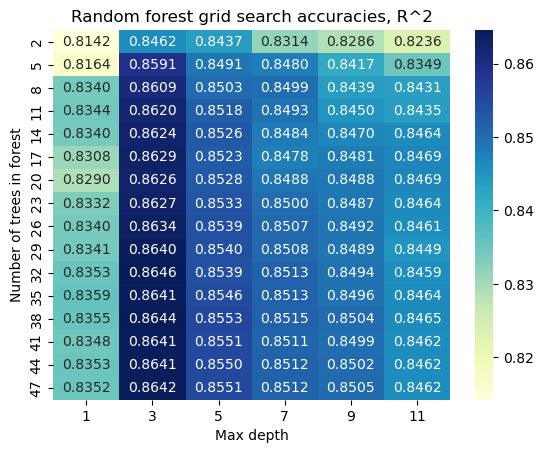

In [314]:

# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2)}


rfr2 = RandomForestRegressor(random_state=43, min_impurity_decrease=0, max_features=2)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)


# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_n_estimators', columns='param_max_depth')

import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".4f")
# Add labels and title
plt.xlabel('Max depth')
plt.ylabel('Number of trees in forest')
plt.title('Random forest grid search accuracies, R^2')
plt.show()



{'max_features': 2, 'min_impurity_decrease': 0}
0.9048962584553814
0.8856226038900051
0     0.840341
1     0.840341
2     0.840341
3     0.840341
4     0.840341
5     0.840341
6     0.840341
7     0.840341
8     0.864562
9     0.864562
10    0.864562
11    0.864562
12    0.864562
13    0.864562
14    0.864562
15    0.864562
16    0.863896
17    0.863896
18    0.863896
19    0.863896
20    0.863896
21    0.863896
22    0.863896
23    0.863896
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.094284,0.037998,0.011157,0.005354,1,0,"{'max_features': 1, 'min_impurity_decrease': 0}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
1,0.105530,0.024331,0.020774,0.028882,1,5,"{'max_features': 1, 'min_impurity_decrease': 5}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
2,0.105003,0.020934,0.010595,0.002583,1,10,"{'max_features': 1, 'min_impurity_decrease': 10}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
3,0.133795,0.034419,0.008953,0.002127,1,15,"{'max_features': 1, 'min_impurity_decrease': 15}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
4,0.092487,0.018391,0.010582,0.002748,1,20,"{'max_features': 1, 'min_impurity_decrease': 20}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
5,0.111437,0.030785,0.011436,0.004215,1,25,"{'max_features': 1, 'min_impurity_decrease': 25}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
6,0.110173,0.029257,0.011911,0.003877,1,30,"{'max_features': 1, 'min_impurity_decrease': 30}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
7,0.114020,0.036823,0.009960,0.001814,1,35,"{'max_features': 1, 'min_impurity_decrease': 35}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
8,0.123608,0.036755,0.013784,0.005781,2,0,"{'max_features': 2, 'min_impurity_decrease': 0}",0.652932,0.921615,0.933226,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916
9,0.134759,0.027596,0.019449,0.012130,2,5,"{'max_features': 2, 'min_impurity_decrease': 5}",0.652932,0.921615,0.933226,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916


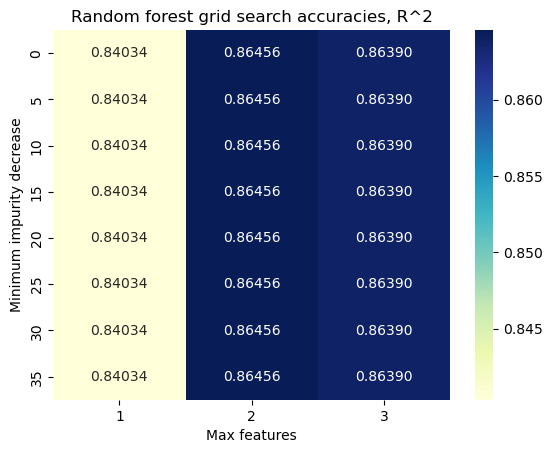

In [313]:

# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(random_state=43, n_estimators=32, max_depth=3)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_min_impurity_decrease', columns='param_max_features')

import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".5f")
# Add labels and title
plt.xlabel('Max features')
plt.ylabel('Minimum impurity decrease')
plt.title('Random forest grid search accuracies, R^2')
plt.show()



